    #Traitement des données de démographie

In [31]:
import pandas as pd

# Chemin vers votre fichier Excel
chemin_fichier = r"/Users/mac/Downloads/projet/Dataset/demographie.xlsx"
# Lire le fichier Excel
demographie = pd.read_excel(chemin_fichier)

In [32]:
demographie

,CODGEO,REG,DEP,LIBGEO,PMUN2021,PMUN2020,PMUN2019,PMUN2018,PMUN2017,PMUN2016,...,PTOT1926,PTOT1921,PTOT1911,PTOT1906,PTOT1901,PTOT1896,PTOT1891,PTOT1886,PTOT1881,PTOT1876
0,01001,84,01,L'Abergement-Clémenciat,832,806,779,771,776,767,...,543.0,566.0,560.0,629.0,637.0,572.0,594.0,622.0,605.0,604.0
1,01002,84,01,L'Abergement-de-Varey,267,262,256,253,248,243,...,253.0,256.0,291.0,323.0,357.0,391.0,421.0,486.0,490.0,484.0
2,01004,84,01,Ambérieu-en-Bugey,14854,14288,14134,14204,14035,14081,...,5705.0,4796.0,4334.0,4100.0,4023.0,3548.0,3635.0,3618.0,3396.0,3427.0
3,01005,84,01,Ambérieux-en-Dombes,1897,1782,1751,1720,1689,1671,...,690.0,698.0,805.0,805.0,835.0,852.0,862.0,882.0,879.0,848.0
4,01006,84,01,Ambléon,113,113,112,112,111,110,...,161.0,150.0,159.0,193.0,200.0,206.0,200.0,200.0,213.0,191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34942,97420,4,974,Sainte-Suzanne,24293,24086,24065,23718,23505,23224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34943,97421,4,974,Salazie,7243,7310,7136,7224,7312,7400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34944,97422,4,974,Le Tampon,81943,80778,79824,79385,78629,77283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34945,97423,4,974,Les Trois-Bassins,6899,6953,7015,7076,7139,7111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Choisissons les dates auquelles il y'a eu des élections
colonne_a_gardé=['LIBGEO','PSDC1999']
Demographie =demographie[colonne_a_gardé].copy()
for i in ['PMUN2007','PMUN2012','PMUN2017','PMUN2021']:
    colonne=['LIBGEO',i]
    tableau = demographie[colonne]
    tableau.columns=colonne_a_gardé
    Demographie = pd.concat([Demographie, tableau], ignore_index=True)
Demographie.columns=['Libellé de la commune','Population']
Demographie['Date']=[2002] * 34947 + [2007] * 34947 + [2012] * 34947+ [2017] * 34947 + [2022] *34947
Demographie

,Libellé de la commune,Population,Date
0,L'Abergement-Clémenciat,728,2002
1,L'Abergement-de-Varey,168,2002
2,Ambérieu-en-Bugey,11436,2002
3,Ambérieux-en-Dombes,1408,2002
4,Ambléon,86,2002
...,...,...,...
174730,Sainte-Suzanne,24293,2022
174731,Salazie,7243,2022
174732,Le Tampon,81943,2022
174733,Les Trois-Bassins,6899,2022


#Traitement des données d'education et generation des echantillons pour chaque commune

In [34]:
import pandas as pd

# Chemin vers votre fichier Excel
chemin_fichier = r"/Users/mac/Downloads/projet/Dataset/donnés d'education.xlsx"
# Lire le fichier Excel
education = pd.read_excel(chemin_fichier)

# Filtrons les lignes pour les années spécifiées auquels il y'a eu des elections
annees_a_garder = [2002, 2007, 2012, 2017, 2022]
df_filtre = education[education['Année'].isin(annees_a_garder)]

# Réinitialiser l'index
df_filtre = df_filtre.reset_index(drop=True)

# Afficher le DataFrame filtré
df_filtre

,Année,Baccalauréat général,Baccalauréat technologique,Baccalauréat professionnel
0,2002,32.40,17.70,11.50
1,2007,33.70,16.40,12.60
2,2012,37.90,16.10,24.40
3,2017,41.60,15.90,22.20
4,2022,43.38,15.69,20.51


In [35]:
def generate_normal_samples(mu_values, sigma_values, size):
    """
    Génère des échantillons suivant une distribution normale.

    Args:
        mu_values (float): Moyenne de la distribution normale.
        sigma_values (float): Écart-type de la distribution normale.
        size (int or tuple of ints): Taille de l'échantillon à générer.

    Returns:
        np.ndarray: Échantillons suivant une distribution normale.
    """
    samples = np.random.normal(loc=mu_values, scale=sigma_values, size=size)
    return samples

*pour generer les taux de reussite en se basant sur le nombre de personnes dans chaque commune et en supposant que la distribution suit une loi normal, nous allons, tout abord determiner les poids qui seront affecter à chaque commune afin d'avoir une génération de données représentative de la commune en question*

In [36]:
Dates=[2002,2007,2012,2017,2022]
listes_des_poids=[]

for date in Dates:
  # Filtrer les lignes où l'année est égale à 2002
  population = Demographie[Demographie['Date'] == date]

 # Calculer la somme de la population pour l'année 2002
  somme_population = population['Population'].sum()

  listes_des_poids.extend(population['Population']/somme_population)


In [37]:
listes_des_poids

[1.2103095564529691e-05,
 2.7930220533530057e-06,
 0.00019012500120324388,
 2.3408184828101378e-05,
 1.4297612892164196e-06,
 3.5677531705330654e-05,
 9.742326924195603e-06,
 4.571911099238551e-06,
 1.2784725946597984e-05,
 5.469668187816303e-06,
 4.571911099238551e-06,
 2.2443927214443795e-06,
 6.0016723884549704e-05,
 8.861194966887809e-06,
 5.5195435816261774e-06,
 6.483801195283763e-06,
 2.493769690493755e-07,
 1.832089465949412e-05,
 1.6126377331859617e-05,
 1.1471340576271273e-06,
 3.19867525633999e-05,
 4.844563252065868e-05,
 1.2668350027708274e-05,
 2.5502951368116134e-05,
 8.794694441807975e-06,
 8.179564584819516e-06,
 1.3582732247555986e-05,
 5.798845786961478e-05,
 4.3125590514272e-05,
 0.00023976764317533956,
 0.00013306755068474675,
 4.605161361778468e-06,
 1.7057384682977285e-05,
 4.039906898599883e-06,
 1.0191205468484479e-05,
 5.6525446317858444e-06,
 1.1354964657381564e-05,
 3.674154010660799e-06,
 5.868671338295303e-05,
 6.832928951952888e-06,
 2.410644034143963e-06

In [38]:
import numpy as np

# Créer une liste pour stocker les échantillons générés
Bac_Tech_list = []
Bac_Gen_list = []
Bac_Pro_list = []

for i in range(5):
    # Calculer l'écart-type comme la racine carrée de la variance
    sigma_values = 1
    size = 34947

    # Utiliser sigma_values pour générer des échantillons suivant une loi normale
    Bac_Tech = generate_normal_samples(df_filtre['Baccalauréat technologique'][i], sigma_values, size)
    Bac_Gen = generate_normal_samples(df_filtre['Baccalauréat général'][i], sigma_values, size)
    Bac_Pro = generate_normal_samples(df_filtre['Baccalauréat professionnel'][i], sigma_values, size)

    # Ajouter les échantillons générés à la liste
    Bac_Tech_list.extend(Bac_Tech)
    Bac_Gen_list.extend(Bac_Gen)
    Bac_Pro_list.extend(Bac_Pro)

# Ajuster les échantillons en fonction de la population de chaque commune
Bac_Tech_list_weighted = [Bac_Tech_list[i] * listes_des_poids[i] for i in range(len(Bac_Tech_list))]
Bac_Gen_list_weighted = [Bac_Gen_list[i] * listes_des_poids[i] for i in range(len(Bac_Gen_list))]
Bac_Pro_list_weighted = [Bac_Pro_list[i] * listes_des_poids[i] for i in range(len(Bac_Pro_list))]

# Créer une liste d'années pondérées pour chaque échantillon
Année = [df_filtre['Année'][i] for i in range(len(df_filtre['Année']))] * 34947

# Créer le DataFrame en utilisant les listes de données ajustées
Niveau_education = pd.DataFrame({
    'Libellé de la commune':Demographie['Libellé de la commune'],
    'Baccalauréat général': Bac_Gen_list_weighted,
    'Baccalauréat technologique': Bac_Tech_list_weighted,
    'Baccalauréat professionnel': Bac_Pro_list_weighted,
    'Date': Année
})

In [39]:
Niveau_education

,Libellé de la commune,Baccalauréat général,Baccalauréat technologique,Baccalauréat professionnel,Date
0,L'Abergement-Clémenciat,0.000410,0.000232,0.000137,2002
1,L'Abergement-de-Varey,0.000094,0.000054,0.000036,2007
2,Ambérieu-en-Bugey,0.005999,0.003234,0.002014,2012
3,Ambérieux-en-Dombes,0.000722,0.000435,0.000304,2017
4,Ambléon,0.000046,0.000025,0.000015,2022
...,...,...,...,...,...
174730,Sainte-Suzanne,0.015337,0.005321,0.007521,2002
174731,Salazie,0.004800,0.001669,0.002227,2007
174732,Le Tampon,0.054372,0.020082,0.025289,2012
174733,Les Trois-Bassins,0.004433,0.001610,0.002088,2017


# Traitement des Données de revenu des menages par communes

 *On constate qu'a apartir de la colonne MED12 LE nombre d'elements manquants est très elevé; ce qui nous amene a ne garder que les 5 premieres colonnes*

In [40]:
import pandas as pd
import os
from tqdm import tqdm

# Liste des noms de fichiers Excel
fichiers_excel = [
    r"/Users/mac/Downloads/projet/Dataset/revenu/revenu 2012.xlsx",
    r"/Users/mac/Downloads/projet/Dataset/revenu/revenu 2017.xlsx",
    r"/Users/mac/Downloads/projet/Dataset/revenu/revenu 2022.xlsx",
]

# Initialisation d'une liste pour stocker les nouveaux DataFrames et les dates correspondantes
revenu_dataframes = []
dates = [2012, 2017, 2022]

# Parcourir chaque fichier Excel
for fichier, date in zip(fichiers_excel, dates):
    # Lire le fichier Excel
    revenu = pd.read_excel(fichier)

    # Sélectionner les cinq premières colonnes
    revenu = revenu.iloc[:, :5]
    revenu.columns = ['CODGEO', 'LIBGEO', 'NBMENFISC', 'NBPERSMENFISC12', 'MED']

    # Exclure la colonne 'LIBGEO' du processus de modification
    for col in revenu.columns:
        if col != 'LIBGEO':
            # Conversion de la colonne en numérique, en remplaçant les valeurs non numériques par NaN
            revenu[col] = pd.to_numeric(revenu[col], errors='coerce')

            # Calcul de la médiane des valeurs numériques dans la colonne
            median_value = revenu[col].median()

            # Remplacement des valeurs non numériques par la médiane calculée
            revenu[col] = revenu[col].fillna(median_value)

    # Ajout de la colonne 'Date' avec une année donnée
    revenu['Date'] = date

    # Ajouter le DataFrame à la liste
    revenu_dataframes.append(revenu)

# Concaténer tous les DataFrames en un seul
revenu_final = pd.concat(revenu_dataframes, ignore_index=True)

revenu_final.columns = ['CODGEO', 'Libellé de la commune', 'NBMENFISC', 'NBPERSMENFISC12', 'MED', 'Date']

# Afficher les premières lignes du DataFrame final
print(revenu_final.head())


   CODGEO    Libellé de la commune  NBMENFISC  NBPERSMENFISC12           MED  \
0  1001.0  L'Abergement-Clémenciat      299.0            780.5  22253.000000   
1  1002.0    L'Abergement-de-Varey       97.0            227.0  21765.714286   
2  1004.0        Ambérieu-en-Bugey     5897.0          13420.0  19236.666667   
3  1005.0      Ambérieux-en-Dombes      615.0           1673.5  21743.888889   
4  1006.0                  Ambléon       48.0            111.0  20354.400000   

   Date  
0  2012  
1  2012  
2  2012  
3  2012  
4  2012  



*   'CODGEO' : le code associer à chaque commune
*  'NBMENFISC' : Nombre de ménages fiscaux

*   'NBPERSMENFISC12' : Nombre de personnes dans les ménages fiscaux
*   'MED' : Médiane du niveau de vie (€)




#traitement des données d'elections

traitement des données du premier tour

In [41]:
import pandas as pd
import os
from tqdm import tqdm

# Liste des noms de fichiers Excel
fichiers_excel = [
    r"/Users/mac/Downloads/projet/Dataset/tr 1/2002 tr 1.xls",
    r"/Users/mac/Downloads/projet/Dataset/tr 1/2007 tr 1.xlsx",
    r"/Users/mac/Downloads/projet/Dataset/tr 1/2012 tr 1.xlsx",
    r"/Users/mac/Downloads/projet/Dataset/tr 1/2017 tr 1.xls",
    r"/Users/mac/Downloads/projet/Dataset/tr 1/2022 tr 1.xlsx"
]

# Initialisation d'une liste pour stocker les nouveaux DataFrames et les dates correspondantes
nouveaux_dataframes = []
dates = [2002,2007,2012,2017,2022]

# Parcourir chaque fichier Excel
for fichier, date in zip(fichiers_excel, dates):

    # Charger le fichier Excel dans un DataFrame pandas
    df = pd.read_excel(fichier)

    # Colonnes à garder
    colonnes_a_garder = ['Libellé de la commune','Inscrits','Abstentions','Votants','Exprimés', 'Sexe', 'Nom', 'Prénom', 'Voix', '% Voix/Ins', '% Voix/Exp']

    # Création d'un nouveau DataFrame avec les colonnes sélectionnées
    nouveau_df = df[colonnes_a_garder].copy()

    # Ajout des valeurs des colonnes supplémentaires
    x = int((df.shape[1] - 13) / 6)
    for j in tqdm(range(1, x)):
        colonnes = ['Libellé de la commune','Inscrits','Abstentions','Votants','Exprimés', f'Sexe.{j}', f'Nom.{j}', f'Prénom.{j}', f'Voix.{j}', f'% Voix/Ins.{j}', f'% Voix/Exp.{j}']
        tableau = df[colonnes]
        tableau.columns=colonnes_a_garder
        nouveau_df = pd.concat([nouveau_df, tableau], ignore_index=True)


    # Ajout de la colonne 'Date' avec une année données
    nouveau_df['Date'] = pd.to_datetime(str(date), format='%Y').year
    # Réinitialisation de l'index
    nouveau_df.reset_index(drop=True, inplace=True)
    # Ajouter le nouveau DataFrame et la date correspondante à la liste
    nouveaux_dataframes.append(nouveau_df)

# Concaténer tous les nouveaux DataFrames en un seul DataFrame
resultat_final = pd.concat(nouveaux_dataframes, ignore_index=True)

# Afficher les premières lignes du DataFrame final
resultat_final

100%|██████████| 11/11 [00:00<00:00, 76.96it/s]


,Libellé de la commune,Inscrits,Abstentions,Votants,Exprimés,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp,Date
0,L'Abergement-Clémenciat,563,121,442,427,M,MEGRET,BRUNO,14,2.49,3.28,2002
1,L'Abergement-de-Varey,196,45,151,147,M,MEGRET,BRUNO,6,3.06,4.08,2002
2,Ambérieu-en-Bugey,7272,2343,4929,4795,M,MEGRET,BRUNO,183,2.52,3.82,2002
3,Ambérieux-en-Dombes,905,221,684,655,M,MEGRET,BRUNO,28,3.09,4.27,2002
4,Ambléon,92,12,80,77,M,MEGRET,BRUNO,1,1.09,1.30,2002
...,...,...,...,...,...,...,...,...,...,...,...,...
2621785,Zurich,24868,14101,10767,10696,M,DUPONT-AIGNAN,Nicolas,189,0.76,1.77,2022
2621786,Taipei,1709,942,767,757,M,DUPONT-AIGNAN,Nicolas,10,0.59,1.32,2022
2621787,Nour-Soultan,117,64,53,51,M,DUPONT-AIGNAN,Nicolas,1,0.85,1.96,2022
2621788,Monterrey,713,553,160,158,M,DUPONT-AIGNAN,Nicolas,1,0.14,0.63,2022


In [42]:
# Liste des années pour lesquelles nous voulons extraire les données
annees = [2012, 2017, 2022]

# Itérer sur chaque année et exécuter le processus
for annee in annees:
    # Filtrer les données pour l'année spécifiée en utilisant .loc pour éviter les avertissements
    df_filtered = resultat_final.loc[resultat_final['Date'] == annee].copy()

    # Créer une nouvelle colonne pour le couple Nom + Prénom en utilisant .loc pour éviter les problèmes de vue ou copie
    df_filtered.loc[:, 'Couple Nom+Prénom'] = df_filtered['Nom'] + " " + df_filtered['Prénom']

    # Extraire les couples uniques
    couples_uniques = df_filtered['Couple Nom+Prénom'].unique()
    print(couples_uniques)


['JOLY Eva' 'LE PEN Marine' 'SARKOZY Nicolas' 'MÉLENCHON Jean-Luc'
 'POUTOU Philippe' 'ARTHAUD Nathalie' 'CHEMINADE Jacques'
 'BAYROU François' 'DUPONT-AIGNAN Nicolas' 'HOLLANDE François']
['LE PEN Marine' 'MÉLENCHON Jean-Luc' 'MACRON Emmanuel' 'FILLON François'
 'LASSALLE Jean' 'DUPONT-AIGNAN Nicolas' 'HAMON Benoît'
 'ASSELINEAU François' 'POUTOU Philippe' 'ARTHAUD Nathalie'
 'CHEMINADE Jacques']
['ARTHAUD Nathalie' 'ROUSSEL Fabien' 'MACRON Emmanuel' 'LASSALLE Jean'
 'LE PEN Marine' 'ZEMMOUR Éric' 'MÉLENCHON Jean-Luc' 'HIDALGO Anne'
 'JADOT Yannick' 'PÉCRESSE Valérie' 'POUTOU Philippe'
 'DUPONT-AIGNAN Nicolas']


In [43]:
!pip install ftfy

zsh:1: command not found: pip


In [44]:
import pandas as pd
import ftfy

# Liste des noms de fichiers Excel
fichiers_excel = [
    r"/Users/mac/Downloads/projet/Dataset/Partis politique.xlsx",
]

# Liste pour stocker les DataFrames
dataframes = []

# Charger chaque fichier Excel dans un DataFrame pandas et corriger les encodages incorrects
for fichier in fichiers_excel:
    df = pd.read_excel(fichier)
    # Appliquer ftfy.fix_text à chaque colonne qui contient des chaînes de caractères
    for col in df.columns:
        if df[col].dtype == object:  # Typiquement pour des colonnes contenant des chaînes de caractères
            df[col] = df[col].apply(ftfy.fix_text)
    dataframes.append(df)

# Afficher chaque DataFrame
for df in dataframes:
    print(df)


       Couple Nom+PrÃ©nom              Partis politiques
0                JOLY Eva     Europe Écologie Les Verts 
1           LE PEN Marine                Front national.
2         SARKOZY Nicolas   Union Populaire Républicaine
3      MÉLENCHON Jean-Luc            La France Insoumise
4         POUTOU Philippe  Nouveau Parti Anticapitaliste
5        ARTHAUD Nathalie                 Lutte Ouvrière
6       CHEMINADE Jacques          Solidarité et Progrès
7         BAYROU François           Mouvement démographe
8   DUPONT-AIGNAN Nicolas           Debout la republique
9       HOLLANDE François               Parti socialiste
10        MACRON Emmanuel                    En Marche !
11        FILLON François               Les Républicains
12          LASSALLE Jean                      Résistons
13           HAMON Benoît               Parti Socialiste
14    ASSELINEAU François   Union Populaire Républicaine
15         ROUSSEL Fabien      Parti Communiste Français
16           ZEMMOUR Éric      

In [45]:
dataframes[0].columns=['Nom_complet','partis politiques']

In [46]:
import pandas as pd
import os
from tqdm import tqdm

# Liste des noms de fichiers Excel
fichiers_excel = [
    r"/Users/mac/Downloads/projet/Dataset/tr 2/2002 tr 2.xls",
    r"/Users/mac/Downloads/projet/Dataset/tr 2/2007 tr 2.xlsx",
    r"/Users/mac/Downloads/projet/Dataset/tr 2/2012 tr 2.xlsx",
    r"/Users/mac/Downloads/projet/Dataset/tr 2/2017 tr 2.xls",
    r"/Users/mac/Downloads/projet/Dataset/tr 2/2022 tr 2.xlsx"
]

# Initialisation d'une liste pour stocker les nouveaux DataFrames et les dates correspondantes
nouveaux_dataframes = []
dates = [2002,2007,2012,2017,2022]

# Parcourir chaque fichier Excel
for fichier, date in zip(fichiers_excel, dates):

    # Charger le fichier Excel dans un DataFrame pandas
    df = pd.read_excel(fichier)

    # Colonnes à garder
    colonnes_a_garder = ['Libellé de la commune','Inscrits','Abstentions','Votants','Exprimés', 'Sexe', 'Nom', 'Prénom', 'Voix', '% Voix/Ins', '% Voix/Exp']

    # Création d'un nouveau DataFrame avec les colonnes sélectionnées
    nouveau_df = df[colonnes_a_garder].copy()

    # Ajout des valeurs des colonnes supplémentaires
    x = 2
    for j in tqdm(range(1, x)):
        colonnes = ['Libellé de la commune','Inscrits','Abstentions','Votants','Exprimés', f'Sexe.{j}', f'Nom.{j}', f'Prénom.{j}', f'Voix.{j}', f'% Voix/Ins.{j}', f'% Voix/Exp.{j}']
        tableau = df[colonnes]
        tableau.columns=colonnes_a_garder
        nouveau_df = pd.concat([nouveau_df, tableau], ignore_index=True)


    # Ajout de la colonne 'Date' avec une année données
    nouveau_df['Date'] = pd.to_datetime(str(date), format='%Y').year
    # Réinitialisation de l'index
    nouveau_df.reset_index(drop=True, inplace=True)
    # Ajouter le nouveau DataFrame et la date correspondante à la liste
    nouveaux_dataframes.append(nouveau_df)

# Concaténer tous les nouveaux DataFrames en un seul DataFrame
tour2_result = pd.concat(nouveaux_dataframes, ignore_index=True)

tour2_result.columns= ['Libellé de la commune', 'Inscrits2',
       'Abstentions2', 'Votants2', 'Exprimés2', 'Sexe', 'Nom', 'Prénom', 'Voix2',
       '% Voix/Ins2', '% Voix/Exp2', 'Date']
# Afficher les premières lignes du DataFrame final
tour2_result

100%|██████████| 1/1 [00:00<00:00, 296.29it/s]


,Libellé de la commune,Inscrits2,Abstentions2,Votants2,Exprimés2,Sexe,Nom,Prénom,Voix2,% Voix/Ins2,% Voix/Exp2,Date
0,L'Abergement-Clémenciat,563,96,467,452,M,CHIRAC,JACQUES,349,61.99,77.21,2002
1,L'Abergement-de-Varey,196,36,160,143,M,CHIRAC,JACQUES,95,48.47,66.43,2002
2,Ambérieu-en-Bugey,7273,1816,5457,5137,M,CHIRAC,JACQUES,4025,55.34,78.35,2002
3,Ambérieux-en-Dombes,905,162,743,692,M,CHIRAC,JACQUES,483,53.37,69.80,2002
4,Ambléon,92,12,80,77,M,CHIRAC,JACQUES,61,66.30,79.22,2002
...,...,...,...,...,...,...,...,...,...,...,...,...
361813,Zurich,24867,13153,11714,11438,F,LE PEN,Marine,1272,5.12,11.12,2022
361814,Taipei,1703,928,775,743,F,LE PEN,Marine,132,7.75,17.77,2022
361815,Nour-Soultan,117,64,53,50,F,LE PEN,Marine,11,9.40,22.00,2022
361816,Monterrey,715,510,205,202,F,LE PEN,Marine,21,2.94,10.40,2022


In [47]:
# Créer une colonne 'label' initialisée avec 0
tour2_result['label'] = 0

# Grouper par 'Libellé de la commune' et 'Date' et trouver l'index de la ligne avec le maximum de 'Voix2' pour chaque groupe
idx_max_voix = tour2_result.groupby(['Libellé de la commune', tour2_result['Date']])['Voix2'].idxmax()

# Marquer les lignes correspondantes avec 1 dans la colonne 'label'
tour2_result.loc[idx_max_voix, 'label'] = 1

# Afficher le DataFrame résultant
print(tour2_result)

          Libellé de la commune  Inscrits2  Abstentions2  Votants2  Exprimés2  \
0       L'Abergement-Clémenciat        563            96       467        452   
1         L'Abergement-de-Varey        196            36       160        143   
2             Ambérieu-en-Bugey       7273          1816      5457       5137   
3           Ambérieux-en-Dombes        905           162       743        692   
4                       Ambléon         92            12        80         77   
...                         ...        ...           ...       ...        ...   
361813                   Zurich      24867         13153     11714      11438   
361814                   Taipei       1703           928       775        743   
361815             Nour-Soultan        117            64        53         50   
361816                Monterrey        715           510       205        202   
361817         Bahamas (Nassau)        137            78        59         51   

       Sexe     Nom   Préno

In [48]:
tour2_result['label']

0         1
1         1
2         1
3         1
4         1
         ..
361813    0
361814    0
361815    0
361816    0
361817    0
Name: label, Length: 361818, dtype: int64

In [49]:
# Compter les valeurs uniques dans la colonne 'label'
label_counts = tour2_result['label'].value_counts()
print(label_counts)

label
0    193180
1    168638
Name: count, dtype: int64


In [50]:
tour2_result['Date']

0         2002
1         2002
2         2002
3         2002
4         2002
          ... 
361813    2022
361814    2022
361815    2022
361816    2022
361817    2022
Name: Date, Length: 361818, dtype: int64

In [51]:
# Fusionner les datasets pour le tour 1 et celui du tour 2 en utilisant les colonnes spécifiées et en conservant toutes les lignes
elections= tour2_result.merge(resultat_final, on=['Libellé de la commune', 'Prénom', 'Nom', 'Sexe', 'Date'], how='inner')

# Afficher les premières lignes du DataFrame fusionné
elections

,Libellé de la commune,Inscrits2,Abstentions2,Votants2,Exprimés2,Sexe,Nom,Prénom,Voix2,% Voix/Ins2,% Voix/Exp2,Date,label,Inscrits,Abstentions,Votants,Exprimés,Voix,% Voix/Ins,% Voix/Exp
0,L'Abergement-Clémenciat,563,96,467,452,M,CHIRAC,JACQUES,349,61.99,77.21,2002,1,563,121,442,427,66,11.72,15.46
1,L'Abergement-de-Varey,196,36,160,143,M,CHIRAC,JACQUES,95,48.47,66.43,2002,1,196,45,151,147,15,7.65,10.20
2,Ambérieu-en-Bugey,7273,1816,5457,5137,M,CHIRAC,JACQUES,4025,55.34,78.35,2002,1,7272,2343,4929,4795,721,9.91,15.04
3,Ambérieux-en-Dombes,905,162,743,692,M,CHIRAC,JACQUES,483,53.37,69.80,2002,1,905,221,684,655,98,10.83,14.96
4,Ambléon,92,12,80,77,M,CHIRAC,JACQUES,61,66.30,79.22,2002,1,92,12,80,77,13,14.13,16.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533993,Zurich,24867,13153,11714,11438,F,LE PEN,Marine,1272,5.12,11.12,2022,0,24868,14101,10767,10696,474,1.91,4.43
533994,Taipei,1703,928,775,743,F,LE PEN,Marine,132,7.75,17.77,2022,0,1709,942,767,757,29,1.70,3.83
533995,Nour-Soultan,117,64,53,50,F,LE PEN,Marine,11,9.40,22.00,2022,0,117,64,53,51,3,2.56,5.88
533996,Monterrey,715,510,205,202,F,LE PEN,Marine,21,2.94,10.40,2022,0,713,553,160,158,4,0.56,2.53


# Visualisation et interprétations

In [52]:
# Grouper les données par le nom de la commune et calculer la somme des populations
communes_grouped = Demographie.groupby('Libellé de la commune')['Population'].sum()

# Trier les communes par ordre décroissant de population et sélectionner les cinq premières
top_5_communes = communes_grouped.sort_values(ascending=False).head(5)

# Afficher les cinq communes les plus peuplées
print(top_5_communes)



Libellé de la commune
Marseille    4239727
Lyon         2452467
Toulouse     2266751
Nice         1723190
Nantes       1477430
Name: Population, dtype: int64


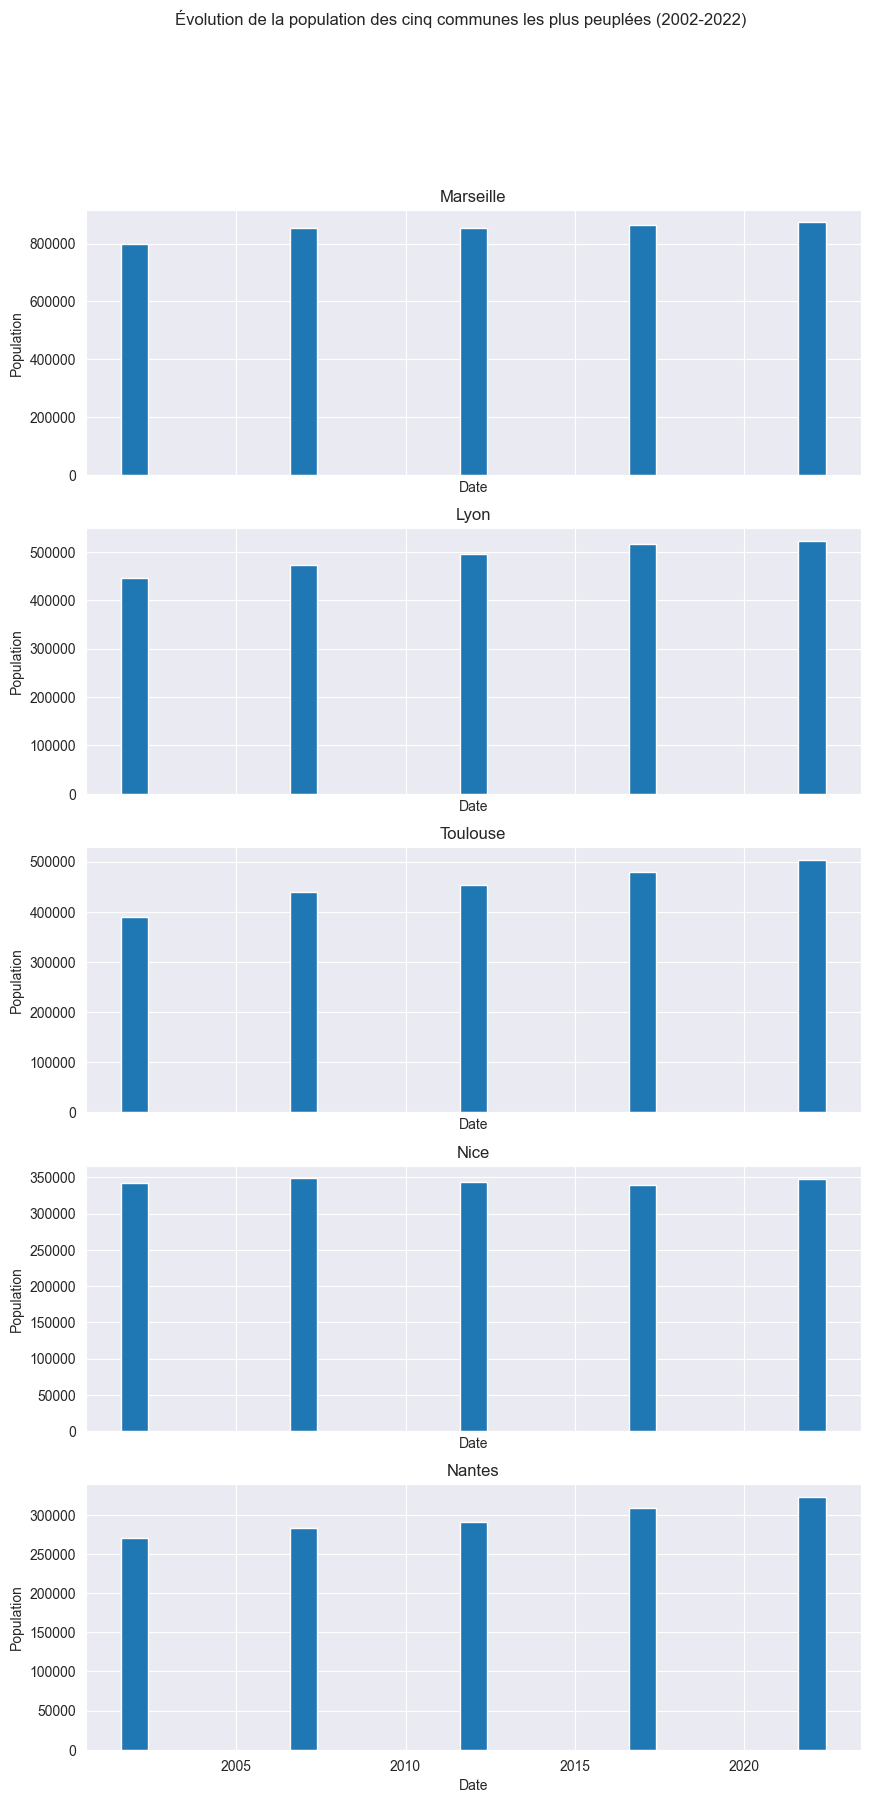

In [53]:
import matplotlib.pyplot as plt

# Liste des cinq communes les plus peuplées
top_5_communes_list = top_5_communes.index.tolist()

# Filtrer les données pour les cinq communes les plus peuplées
top_5_communes_data = Demographie[Demographie['Libellé de la commune'].isin(top_5_communes_list)]
# Création d'une figure et des axes pour les sous-graphiques
fig, axs = plt.subplots(5, 1, figsize=(10, 20), sharex=True)

# Parcours des cinq communes
for i, commune in enumerate(top_5_communes_list):
    # Sélection des données pour la commune spécifique
    commune_data = top_5_communes_data[top_5_communes_data['Libellé de la commune'] == commune]
    # Tracé de l'histogramme de la population pour chaque année
    axs[i].bar(commune_data['Date'], commune_data['Population'])
    # Ajout de titre pour chaque sous-graphique
    axs[i].set_title(commune)
    axs[i].set_ylabel('Population')
    axs[i].set_xlabel('Date')

# Ajout de titre pour l'ensemble du graphique
fig.suptitle('Évolution de la population des cinq communes les plus peuplées (2002-2022)')

# Affichage du graphique
plt.show()


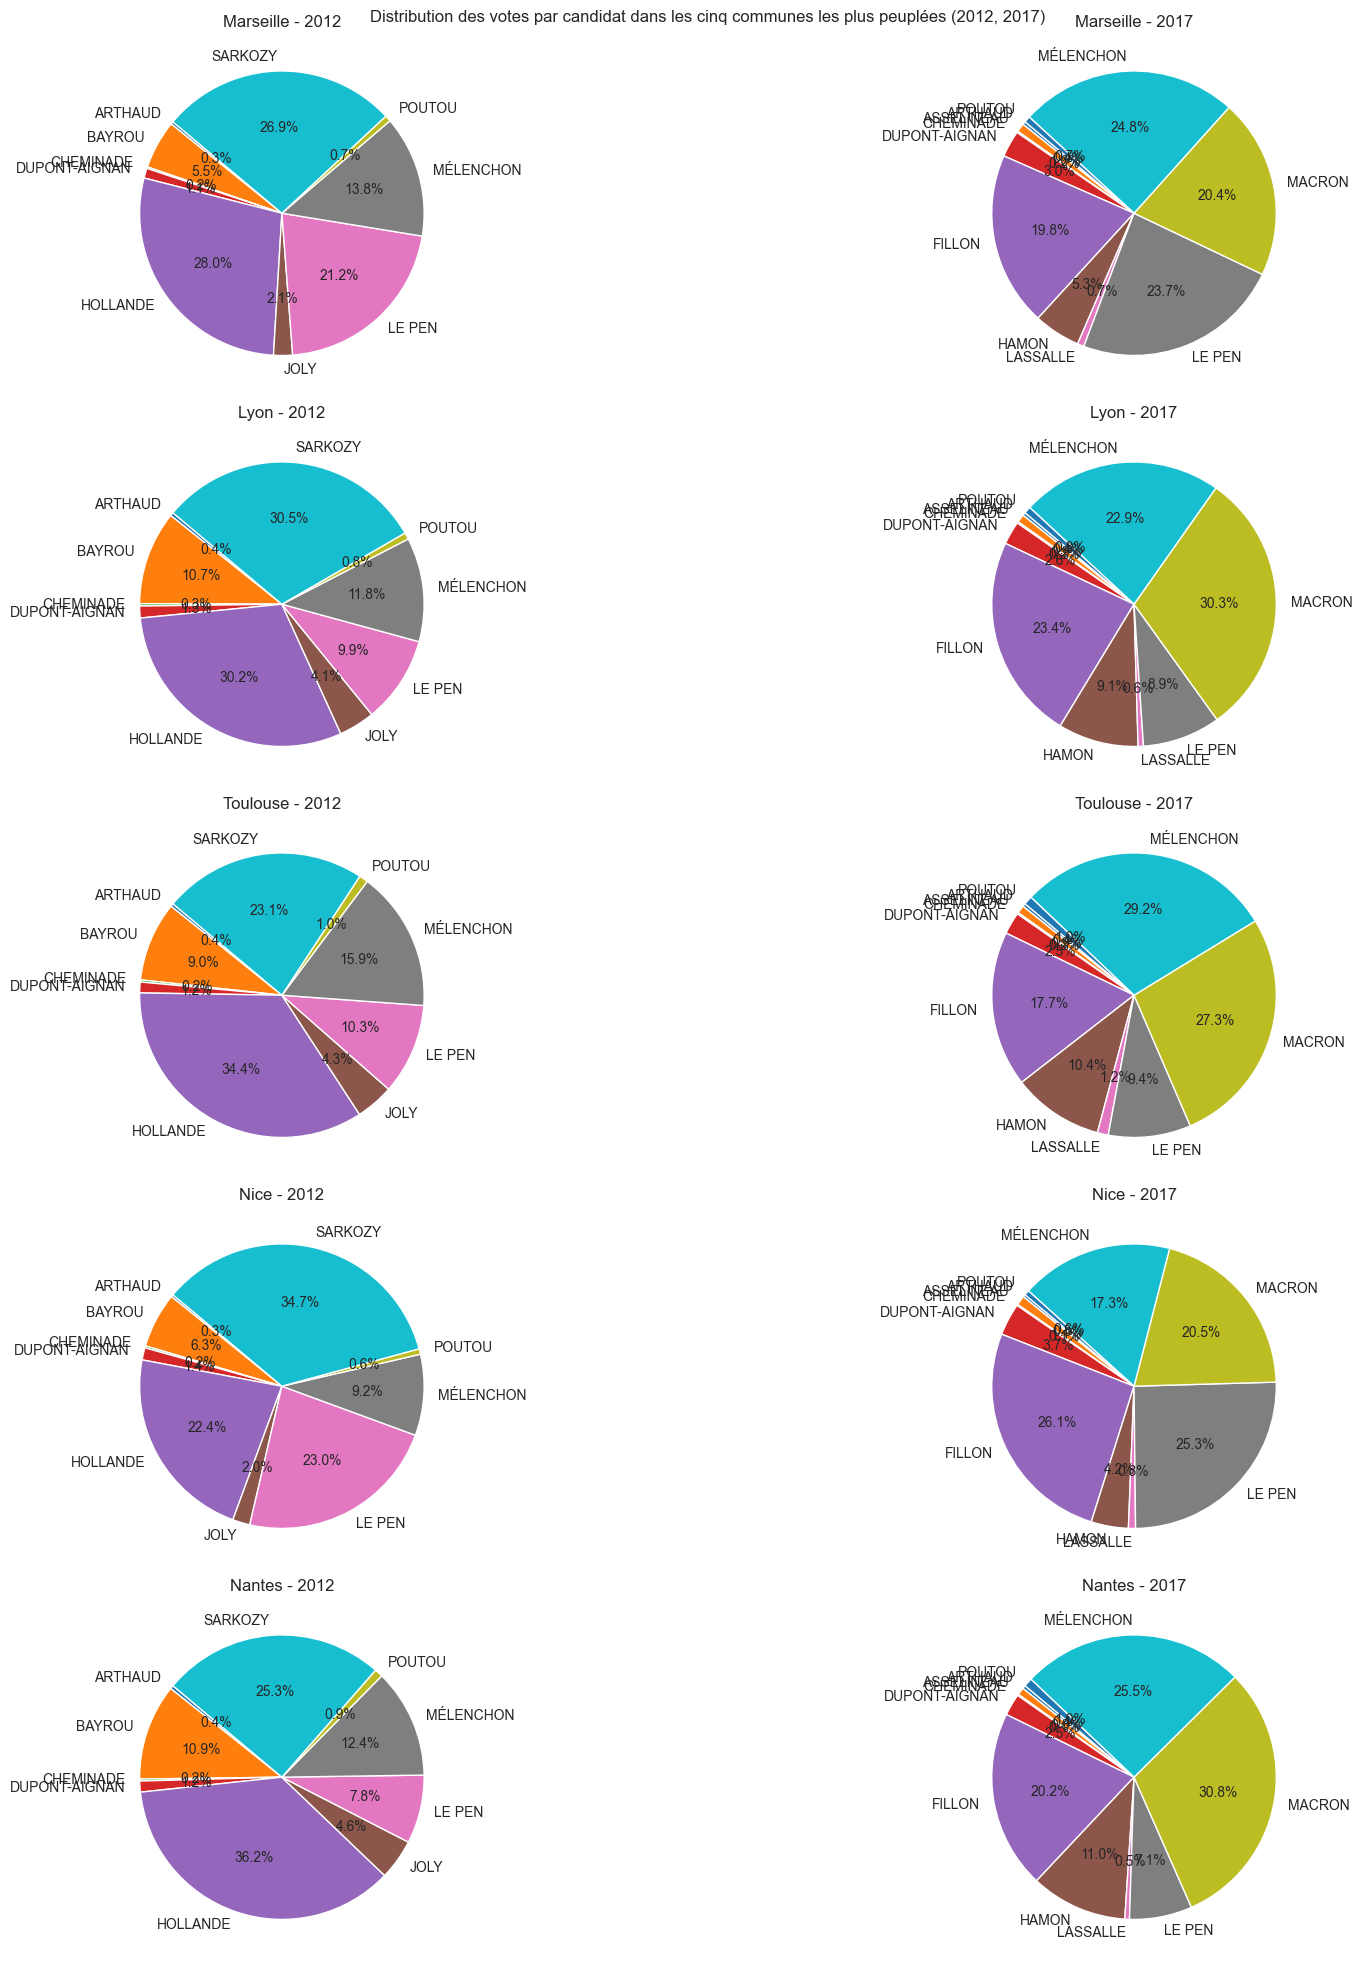

In [54]:
import matplotlib.pyplot as plt

# Liste des années
annees = [2012, 2017]

# Liste des cinq communes
top_5_communes_list = ['Marseille', 'Lyon', 'Toulouse', 'Nice', 'Nantes']

# Création d'une figure et des axes pour les sous-graphiques
fig, axs = plt.subplots(5, len(annees), figsize=(20, 20), sharex=True, sharey=True)

# Parcours des années
for j, annee in enumerate(annees):
    # Parcours des cinq communes
    for i, commune in enumerate(top_5_communes_list):
        # Sélection des données pour la commune spécifique et l'année spécifique
        commune_data = resultat_final[(resultat_final['Libellé de la commune'] == commune) & (resultat_final['Date'] == annee)]
        # Regroupement des données par candidat et calcul du nombre total de voix pour chaque candidat
        votes_par_candidat = commune_data.groupby('Nom')['Voix'].sum()
        # Création du diagramme circulaire
        axs[i, j].pie(votes_par_candidat, labels=votes_par_candidat.index, autopct='%1.1f%%', startangle=140)
        # Ajout de titre pour chaque sous-graphique
        axs[i, j].set_title(f"{commune} - {annee}")

# Ajout de titre pour l'ensemble du graphique
fig.suptitle('Distribution des votes par candidat dans les cinq communes les plus peuplées (2012, 2017)')

# Ajustement de la disposition des sous-graphiques
plt.tight_layout()

# Affichage du graphique
plt.show()


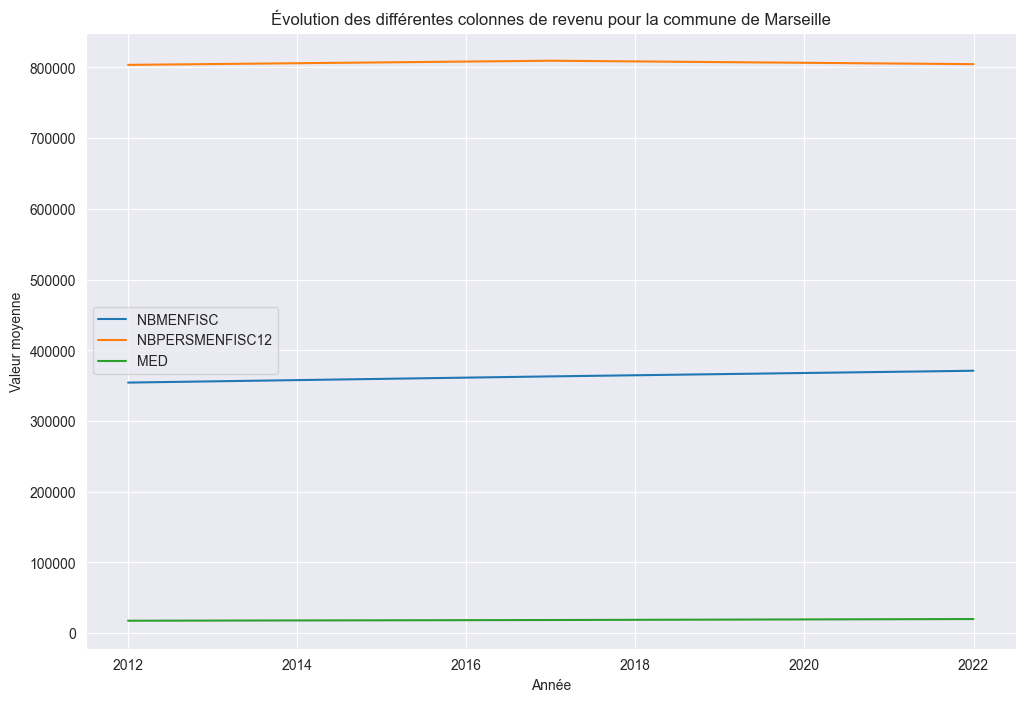

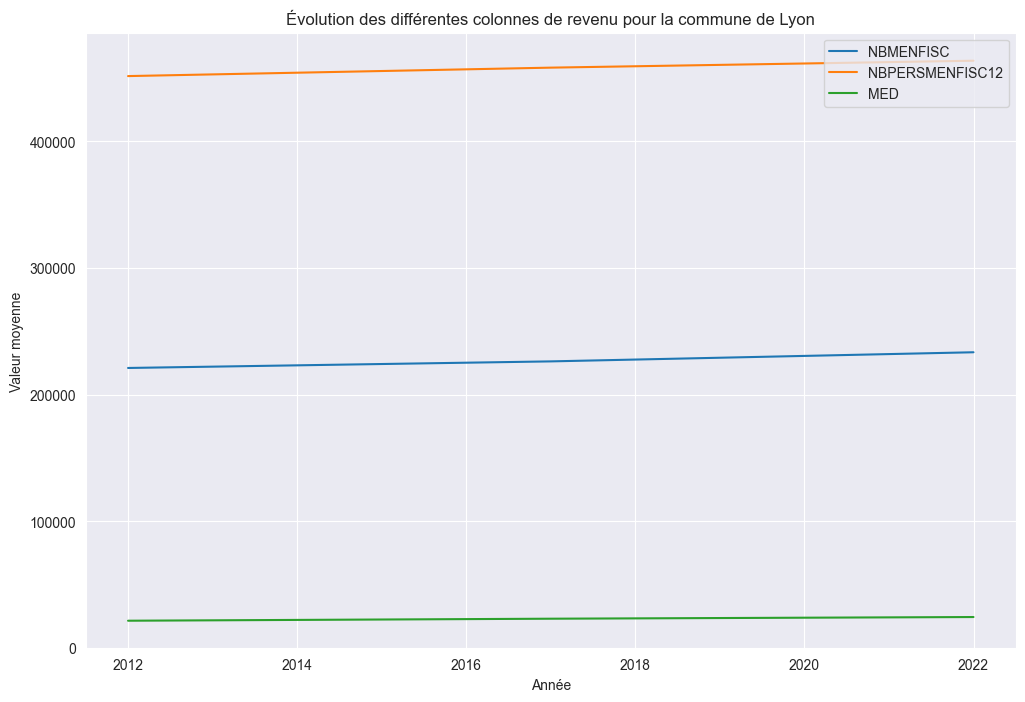

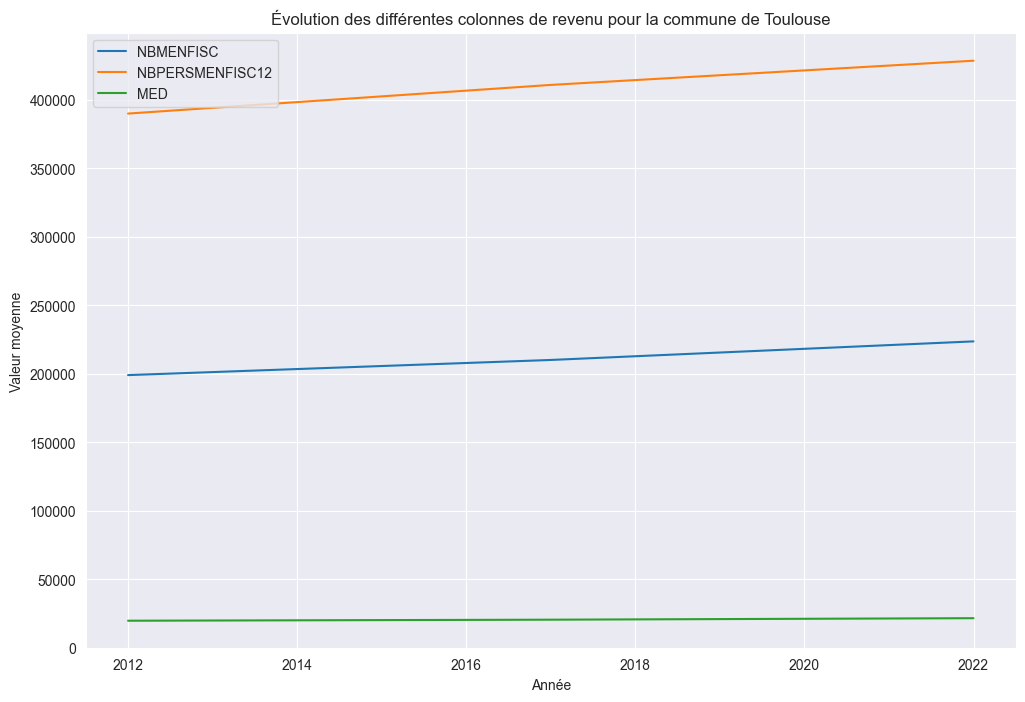

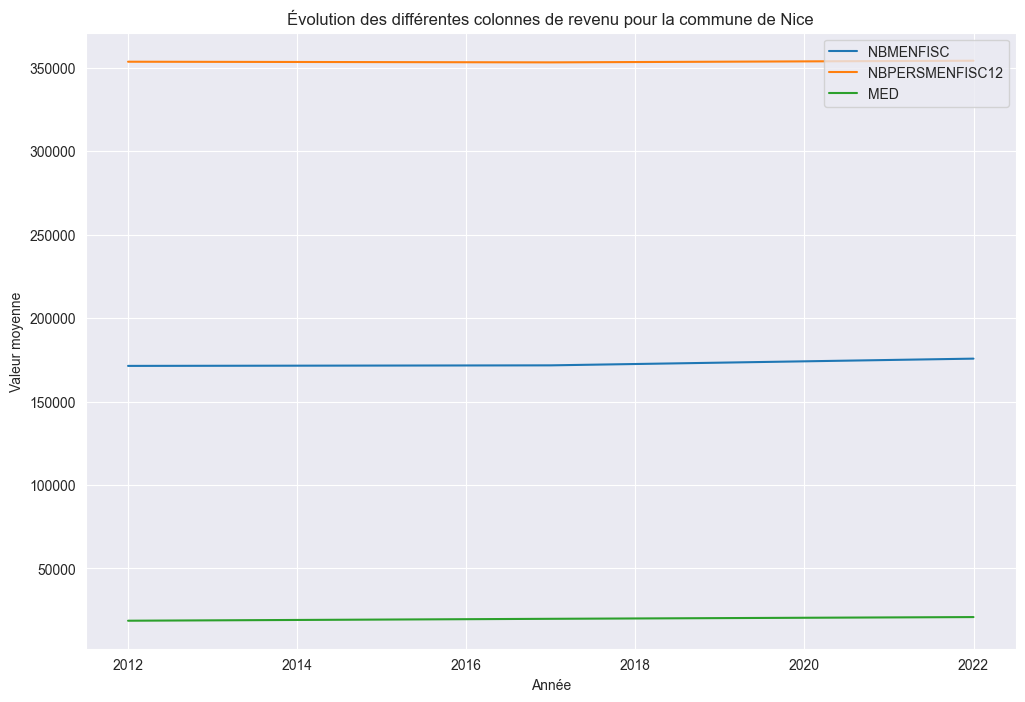

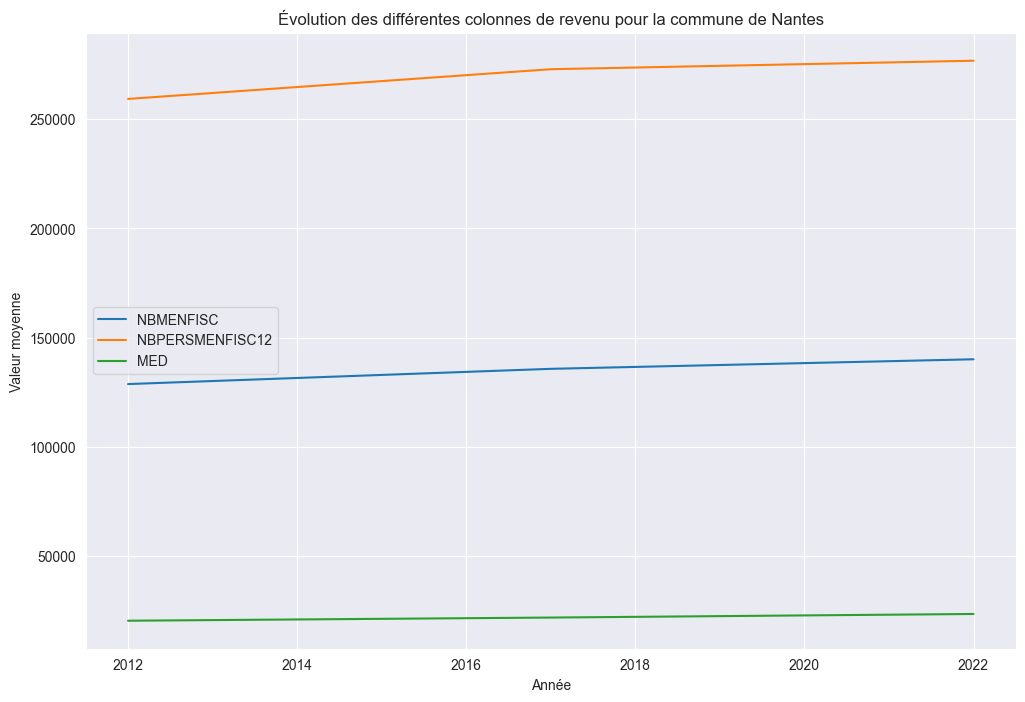

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des années
annees = [2012, 2017, 2022]

# Colonnes à tracer
colonnes = ['NBMENFISC', 'NBPERSMENFISC12', 'MED']

# Libellés des communes spécifiques
communes_specifiques = ['Marseille', 'Lyon', 'Toulouse', 'Nice', 'Nantes']

# Boucle sur les libellés de commune spécifiques
for commune in communes_specifiques:
    # Création d'une figure et d'axes pour chaque commune
    fig, ax = plt.subplots(figsize=(12, 8))

    # Titre du graphique avec le nom de la commune
    ax.set_title(f'Évolution des différentes colonnes de revenu pour la commune de {commune}')

    # Boucle sur les colonnes
    for i, colonne in enumerate(colonnes):
        # Initialisation des données pour la colonne
        donnees_colonne = []
        # Parcours des années
        for annee in annees:
            # Sélection des données pour l'année spécifique, la colonne spécifique et le libellé de commune spécifique
            annee_data = revenu_final[(revenu_final['Date'] == annee) & (revenu_final['Libellé de la commune'] == commune)]
            valeurs_colonne = annee_data[colonne]
            # Calcul de la moyenne pour l'année spécifique
            moyenne_valeurs = np.mean(valeurs_colonne)
            # Ajout de la moyenne calculée aux données de la colonne
            donnees_colonne.append(moyenne_valeurs)
        # Tracé de la courbe pour la colonne
        ax.plot(annees, donnees_colonne, label=colonne)

    # Étiquettes pour les axes
    ax.set_xlabel('Année')
    ax.set_ylabel('Valeur moyenne')

    # Légende
    ax.legend()

    # Affichage du graphique pour la commune spécifique
    plt.grid(True)
    plt.show()


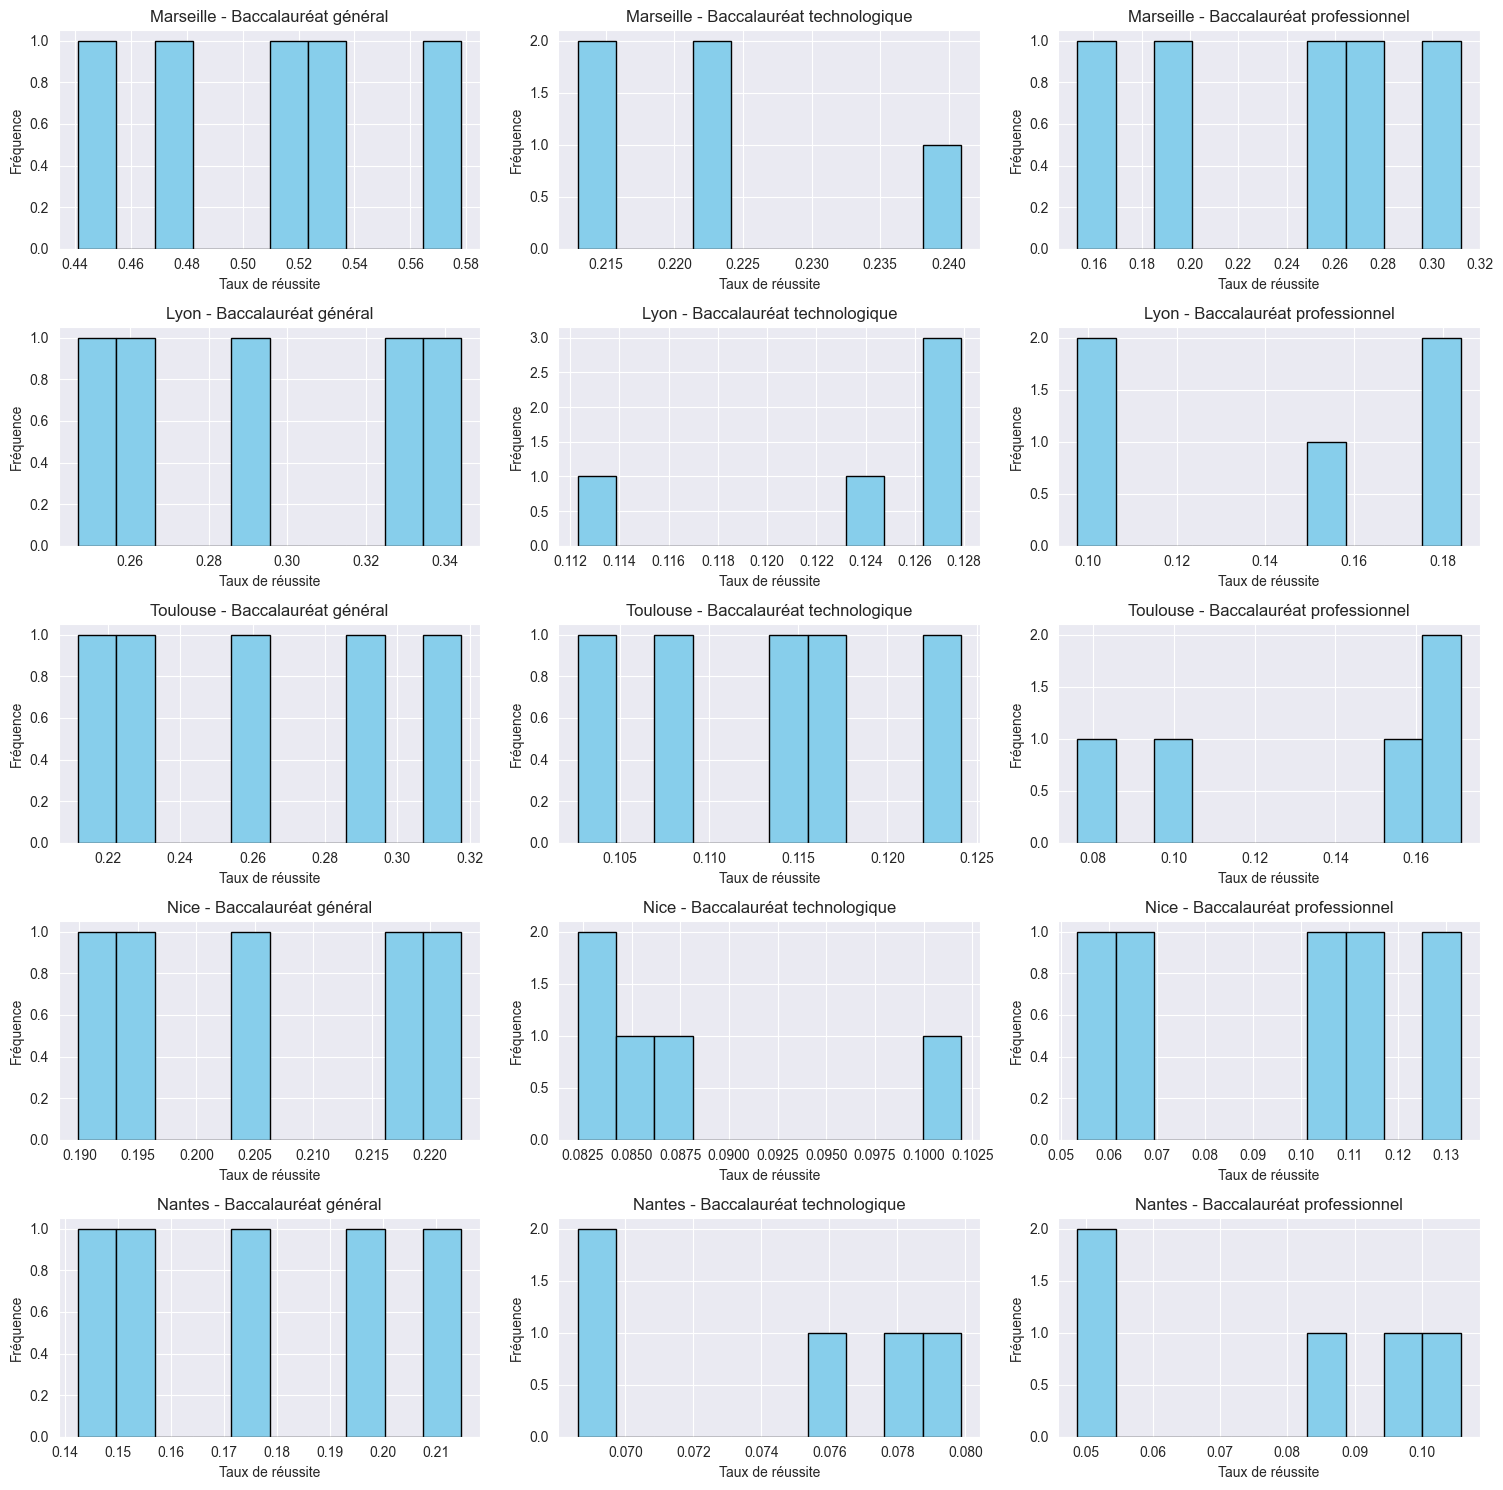

In [56]:
import matplotlib.pyplot as plt
import numpy as np


# Colonnes à tracer
colonnes = ['Baccalauréat général', 'Baccalauréat technologique', 'Baccalauréat professionnel']

# Libellés des communes spécifiques
communes_specifiques = ['Marseille', 'Lyon', 'Toulouse', 'Nice', 'Nantes']

# Création d'une figure et d'axes
fig, axs = plt.subplots(len(communes_specifiques), len(colonnes), figsize=(15, 15))

# Boucle sur les libellés de commune spécifiques
for i, commune in enumerate(communes_specifiques):
    # Sélection des données pour la commune spécifique
    commune_data = Niveau_education[Niveau_education['Libellé de la commune'] == commune]

    # Boucle sur les colonnes
    for j, colonne in enumerate(colonnes):
        # Données à tracer
        donnees = commune_data[colonne]

        # Tracé de l'histogramme
        axs[i, j].hist(donnees, bins=10, color='skyblue', edgecolor='black')

        # Ajout de titres et d'étiquettes
        axs[i, j].set_title(f'{commune} - {colonne}')
        axs[i, j].set_xlabel('Taux de réussite')
        axs[i, j].set_ylabel('Fréquence')
        axs[i, j].grid(True)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage du graphique
plt.show()


#Fusion des Datasets déjà traités


In [57]:
# Importer la bibliothèque pandas
import pandas as pd

# Définir les dates pour lesquelles vous souhaitez fusionner les données
dates = [2017,2022]

# Filtrer les ensembles de données originaux pour les dates spécifiées
elections_filtered = elections[elections['Date'].isin(dates)]
niveau_education_filtered = Niveau_education[Niveau_education['Date'].isin(dates)]
revenu_final_filtered = revenu_final[revenu_final['Date'].isin(dates)]
demographie_filtered = Demographie[Demographie['Date'].isin(dates)]

# Fusionner les ensembles de données en utilisant les colonnes communes
Dataset = pd.merge(elections_filtered, niveau_education_filtered, on=['Libellé de la commune', 'Date'], how='inner') \
             .merge(revenu_final_filtered, on=['Libellé de la commune', 'Date'], how='inner') \
             .merge(demographie_filtered, on=['Libellé de la commune', 'Date'], how='inner')

# Afficher le jeu de données fusionné
print(Dataset)


            Libellé de la commune  Inscrits2  Abstentions2  Votants2  \
0         L'Abergement-Clémenciat        598           100       498   
1           L'Abergement-de-Varey        209            32       177   
2               Ambérieu-en-Bugey       8586          2312      6274   
3             Ambérieux-en-Dombes       1172           259       913   
4                         Ambléon         99            23        76   
...                           ...        ...           ...       ...   
12608381                   Vienne       7438          3514      3924   
12608382                   Vienne       7438          3514      3924   
12608383                   Vienne       7438          3514      3924   
12608384                   Vienne       7438          3514      3924   
12608385                   Vienne       7438          3514      3924   

          Exprimés2 Sexe     Nom    Prénom  Voix2  % Voix/Ins2  ...  \
0               453    M  MACRON  Emmanuel    272        45.48  

In [58]:
# Créer une nouvelle colonne en concaténant les colonnes 'Nom' et 'Prénom'
Dataset['Nom_complet'] = Dataset['Nom'] + ' ' + Dataset['Prénom']


In [59]:
# Fusionner Dataset avec le premier DataFrame dans dataframes sur la colonne 'Nom_complet'
merged_df = pd.merge(Dataset, dataframes[0], on='Nom_complet', how='inner')

# Afficher le DataFrame fusionné
print(merged_df)

            Libellé de la commune  Inscrits2  Abstentions2  Votants2  \
0         L'Abergement-Clémenciat        598           100       498   
1           L'Abergement-de-Varey        209            32       177   
2               Ambérieu-en-Bugey       8586          2312      6274   
3             Ambérieux-en-Dombes       1172           259       913   
4                         Ambléon         99            23        76   
...                           ...        ...           ...       ...   
12608381                   Vienne       7438          3514      3924   
12608382                   Vienne       7438          3514      3924   
12608383                   Vienne       7438          3514      3924   
12608384                   Vienne       7438          3514      3924   
12608385                   Vienne       7438          3514      3924   

          Exprimés2 Sexe     Nom    Prénom  Voix2  % Voix/Ins2  ...  \
0               453    M  MACRON  Emmanuel    272        45.48  

In [60]:
merged_df.columns

Index(['Libellé de la commune', 'Inscrits2', 'Abstentions2', 'Votants2',
       'Exprimés2', 'Sexe', 'Nom', 'Prénom', 'Voix2', '% Voix/Ins2',
       '% Voix/Exp2', 'Date', 'label', 'Inscrits', 'Abstentions', 'Votants',
       'Exprimés', 'Voix', '% Voix/Ins', '% Voix/Exp', 'Baccalauréat général',
       'Baccalauréat technologique', 'Baccalauréat professionnel', 'CODGEO',
       'NBMENFISC', 'NBPERSMENFISC12', 'MED', 'Population', 'Nom_complet',
       'partis politiques'],
      dtype='object')

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
encoder=LabelEncoder()

Dataset = merged_df.copy()
# Effectuer l'encodage des étiquettes dans la colonne 'Nom_complet'
Dataset['partis politiques']= le.fit_transform(Dataset['partis politiques'])

Dataset['Libellé de la commune']= encoder.fit_transform(Dataset['Libellé de la commune'])

# Supprimer les colonnes 'Nom' et 'Prénom'
Dataset.drop(['Nom', 'Prénom','Nom_complet'], axis=1, inplace=True)

##realisation du one-hot encoding pour les colonnes les features en chaine de caractères

# Ajouter les colonnes  à la liste des colonnes à encoder en one-hot
one_hot_encode_cols = ['Sexe']

# Appliquer le one-hot encoding aux colonnes sélectionnées
Dataset = pd.get_dummies(Dataset, columns=one_hot_encode_cols, drop_first=True)

In [62]:
# Transformation inverse de toutes les valeurs encodées dans la colonne 'Nom_complet'
decoded_values = le.inverse_transform(Dataset['partis politiques'])

# Affichage des valeurs décodées
print(decoded_values)

['En Marche !' 'En Marche !' 'En Marche !' ... 'Front national.'
 'Front national.' 'Front national.']


In [63]:
le=LabelEncoder()
# Effectuer l'encodage des étiquettes dans la colonne 'President'
Dataset["label"] = le.fit_transform(Dataset["label"])

#Nettoyage des données

In [64]:
# Supprimer les colonnes 'Nom' et 'Prénom'
Dataset.drop(['% Voix/Ins2', '% Voix/Exp2','Voix2', 'Voix', '% Voix/Ins', '% Voix/Exp'], axis=1, inplace=True)


In [65]:
#Préparation des vécteurs
X = Dataset.loc[:, "Libellé de la commune":'partis politiques'].drop(columns=["label"])
Y=Dataset["label"]

In [66]:
le=LabelEncoder()
# Effectuer l'encodage des étiquettes dans la colonne 'Attack_type'
Y = le.fit_transform(Y)

#Utilisation du PCA sur la dataset 

In [67]:
from sklearn.preprocessing import StandardScaler
# Appliquer le StandardScaler aux caractéristiques numériques
scaler = StandardScaler()
X_standardiser = scaler.fit_transform(X)
print(X)

          Libellé de la commune  Inscrits2  Abstentions2  Votants2  Exprimés2  \
0                         12550        598           100       498        453   
1                         12553        209            32       177        150   
2                           460       8586          2312      6274       5456   
3                           462       1172           259       913        812   
4                           440         99            23        76         59   
...                         ...        ...           ...       ...        ...   
12608381                  30281       7438          3514      3924       3761   
12608382                  30281       7438          3514      3924       3761   
12608383                  30281       7438          3514      3924       3761   
12608384                  30281       7438          3514      3924       3761   
12608385                  30281       7438          3514      3924       3761   

          Date  Inscrits  A

<Axes: >

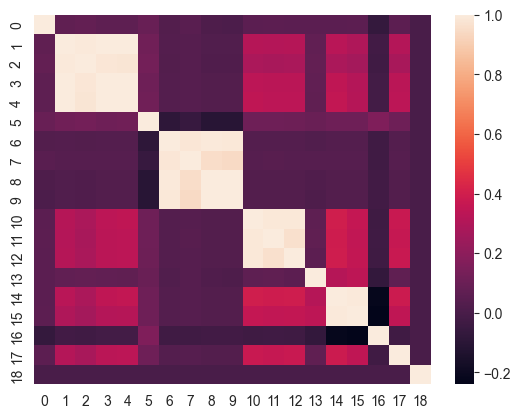

In [68]:
import seaborn as sns

# Supposons que X_standardiser est votre tableau NumPy contenant les données standardisées

# Convertir X_standardiser en un DataFrame pandas avec des colonnes appropriées
df_standardise = pd.DataFrame(X_standardiser)

# Calculer la corrélation entre les variables
corr = df_standardise.corr()

# Tracer la heatmap de la corrélation
sns.heatmap(data=corr)

In [69]:
from sklearn.decomposition import PCA

import pandas as pd

# Création de l'objet PCA avec un nombre de composants approprié
pca = PCA(n_components=14, svd_solver='full', random_state=1001)

# Ajustement du PCA sur les données standardisées
X_pca = pca.fit_transform(df_standardise)

# Obtenez les noms des entités en sortie pour la transformation
feature_names_out = [f"PC{j+1}" for j in range(X_pca.shape[1])]  # Créez les noms des composants principaux

# Créer un DataFrame pandas avec les données transformées
data_pca = pd.DataFrame(X_pca, columns=feature_names_out)

# Afficher les données PCA
print(data_pca)


               PC1       PC2       PC3       PC4       PC5       PC6  PC7  \
0        -0.966044  0.059978 -0.282773 -0.907211  1.533142  1.137185  1.0   
1        -1.096687 -0.170740 -0.317299 -0.993138  1.372154  1.229807  1.0   
2         1.497600  4.591324  0.131687 -0.727570  2.407720  2.474731  1.0   
3        -0.888197  0.378196 -0.306705 -0.996448  1.899635  2.606392  1.0   
4        -1.191618 -0.245934 -0.318970 -1.055265  1.814493  2.638758  1.0   
...            ...       ...       ...       ...       ...       ...  ...   
12608381  2.387327 -0.394852  1.671686  0.311477 -0.407615 -0.846320 -1.0   
12608382  2.379262 -0.455629  1.672929  0.312156 -0.402310 -0.845582 -1.0   
12608383  2.404517 -0.253125  1.668561  0.308549 -0.412877 -0.842063 -1.0   
12608384  2.403270 -0.260307  1.668668  0.308383 -0.410950 -0.840879 -1.0   
12608385  2.859326  3.332035  1.592313  0.251093 -0.633768 -0.808146 -1.0   

               PC8       PC9      PC10      PC11      PC12      PC13      P

la matrice de correlation des données obtenu a travers le PCA

<Axes: >

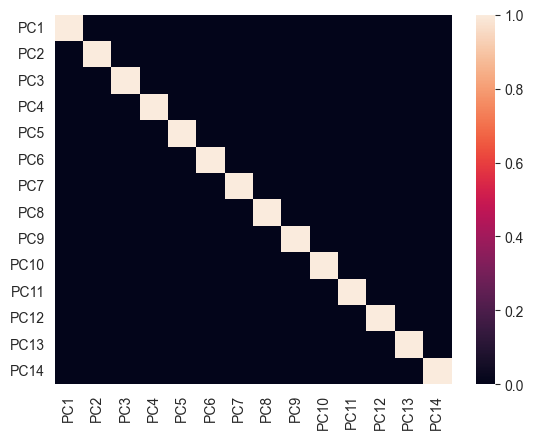

In [70]:
# Calculer la corrélation entre les variables
corr = data_pca.corr()

# Tracer la heatmap de la corrélation
sns.heatmap(data=corr)

Les features restante sont non correler, car on constate que la couleurs omnipresente represente une correlation nulle entre les features

In [71]:
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

Explained variance: 0.9999


les features restantes permettent a elles seule d'expliquer 99 pourcent de la variance du modèle

In [72]:
# Importer les bibliothèques nécessaires
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(data_pca, Y, test_size=0.3, random_state=42)

In [73]:
X_test.index

Index([ 8987713,  9631234,  2658455,  5844361,  9850288,  9282340,  5401337,
       10757400,  6061533,   769769,
       ...
        8482560,  4944858,  3801134, 11281171,  5789235, 11974081,  9027178,
        8461466, 11640003,  5496984],
      dtype='int64', length=3782516)

In [74]:
merged_df.columns

Index(['Libellé de la commune', 'Inscrits2', 'Abstentions2', 'Votants2',
       'Exprimés2', 'Sexe', 'Nom', 'Prénom', 'Voix2', '% Voix/Ins2',
       '% Voix/Exp2', 'Date', 'label', 'Inscrits', 'Abstentions', 'Votants',
       'Exprimés', 'Voix', '% Voix/Ins', '% Voix/Exp', 'Baccalauréat général',
       'Baccalauréat technologique', 'Baccalauréat professionnel', 'CODGEO',
       'NBMENFISC', 'NBPERSMENFISC12', 'MED', 'Population', 'Nom_complet',
       'partis politiques'],
      dtype='object')

In [75]:
merged_df["Nom_complet"][8987713]

'LE PEN Marine'

Nous avons un très grand déséquilibre entre les features on a une occurence d'elements de classe 0 (perdant) qui supasse de très loin le nombre d'élement de la classe 1(gagnant) ce qui peut empecher le modèle de pouvoir generaliser. dans un tels cas nous pouvons utiliser des methodes tels que SMOTE pour la generation de données afin d'equilibrer les données, ou l'on pourrait utiliser les methode de sous echantillonnage pour reduire la classe avec un nombre de feature très elevé.

#Reéquilibrage de la dataset 

Recherche de meilleurs paramètres pour la method de sous echantillonnage

L'objectif principal de la Neighbourhood Cleaning Rule est d'améliorer la qualité des données en éliminant les exemples bruyants ou mal classés qui pourraient compromettre les performances du modèle. Cette méthode repose sur le principe que les échantillons de la classe majoritaire qui sont mal classés par leurs voisins sont plus susceptibles d'être du bruit et peuvent donc être supprimés en toute sécurité.

In [77]:
from imblearn.under_sampling import NeighbourhoodCleaningRule, RandomUnderSampler
from sklearn.datasets import make_classification
from collections import Counter

# Afficher la distribution initiale des classes
print("Distribution des classes avant sous-échantillonnage :", Counter(y_train))

# Initialiser NeighbourhoodCleaningRule avec les paramètres souhaités
ncr = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)

# Appliquer NeighbourhoodCleaningRule pour nettoyer les données
X_cleaned, y_cleaned = ncr.fit_resample(X_train, y_train)
# Afficher la distribution des classes après nettoyage
print("Distribution des classes après nettoyage :", Counter(y_cleaned))

# Initialiser RandomUnderSampler pour équilibrer les classes
rus = RandomUnderSampler()

# Appliquer RandomUnderSampler pour obtenir un dataset équilibré
X_resampled, y_resampled = rus.fit_resample(X_cleaned, y_cleaned)

# Afficher la distribution des classes après sous-échantillonnage
print("Distribution des classes après sous-échantillonnage :", Counter(y_resampled))

Distribution des classes avant sous-échantillonnage : Counter({0: 8171757, 1: 654113})
Distribution des classes après nettoyage : Counter({0: 8088786, 1: 654113})
Distribution des classes après sous-échantillonnage : Counter({0: 654113, 1: 654113})


#Arbre de décision

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
# modèle de Regression Logistique
model = DecisionTreeClassifier()
model.fit(X_resampled, y_resampled )

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

#Rapport de classification
print(classification_report(y_test, y_pred))

Accuracy: 96.81%
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   3502076
           1       0.71      0.97      0.82    280440

    accuracy                           0.97   3782516
   macro avg       0.85      0.97      0.90   3782516
weighted avg       0.98      0.97      0.97   3782516


        Nom complet           Commune  Label prédit  Label de test  année
0     LE PEN Marine      Saint-Michel             0              0   2022
1     LE PEN Marine     Saint-Sauveur             0              0   2022
2     LE PEN Marine    Sainte-Colombe             0              0   2017
3   MACRON Emmanuel          Beaulieu             0              0   2022
4     LE PEN Marine        Saint-Paul             0              0   2022
5     LE PEN Marine  Saint-Christophe             0              0   2022
6   MACRON Emmanuel           Lagarde             0              0   2022
7     LE PEN Marine       Saint-Aubin             0              0   2022
8   MACRON Emmanuel         Le Vernet             0              0   2022
9   MACRON Emmanuel      Sainte-Gemme             0              0   2017
10    LE PEN Marine          Beaufort             1              0   2017
11  MACRON Emmanuel   Saint-Hippolyte             0              0   2022
12    LE PEN Marine      Saint-Julien 

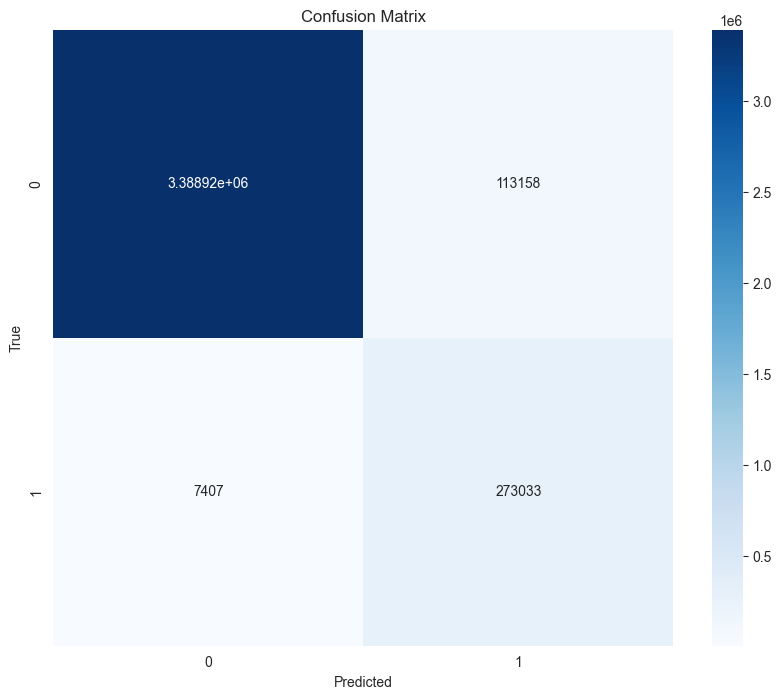

In [79]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Indices des 15 premiers éléments de test
indices_test = X_test.index[:15].tolist()

# Liste pour stocker les données
data = {'Nom complet': [], 'Commune': [], 'Label prédit': [], 'Label de test': [] , 'année': [] }

# Boucle sur les indices de test
for idx in indices_test:
    # Nom complet du candidat
    nom_complet = merged_df.loc[idx, "Nom_complet"]
    # Libellé de la commune
    commune = merged_df.loc[idx, "Libellé de la commune"]
    # année
    année = merged_df.loc[idx, 'Date']

    data['Nom complet'].append(nom_complet)
    data['Commune'].append(commune)
    data['année'].append(année)

for j in range(15):  
    # Label prédit
    y_pred_label = y_pred[j]
    # Label de test
    y_test_label = y_test[j]

    data['Label prédit'].append(y_pred_label)
    data['Label de test'].append(y_test_label)
        
# Créer la DataFrame
result_df = pd.DataFrame(data)

# Afficher la DataFrame résultante
print(result_df)

# Supposez que y_true sont les vraies étiquettes et y_pred sont les prédictions du modèle

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme graphique
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [80]:
import joblib

# Enregistrer le modèle
joblib.dump(model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

# charger le modèle deja entrainer et lancer

In [85]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pour charger le modèle plus tard
loaded_model = joblib.load('decision_tree_model.pkl')

# Evaluate the model
y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

#Rapport de classification
print(classification_report(y_test, y_pred))


# Indices des 15 premiers éléments de test
indices_test = X_test.index[:15].tolist()

# Liste pour stocker les données
data = {'Nom complet': [], 'Commune': [], 'Label prédit': [], 'Label de test': [] , 'année': [] }

# Boucle sur les indices de test
for idx in indices_test:
    # Nom complet du candidat
    nom_complet = merged_df.loc[idx, "Nom_complet"]
    # Libellé de la commune
    commune = merged_df.loc[idx, "Libellé de la commune"]
    # année
    année = merged_df.loc[idx, 'Date']

    data['Nom complet'].append(nom_complet)
    data['Commune'].append(commune)
    data['année'].append(année)

for j in range(15):  
    # Label prédit
    y_pred_label = y_pred[j]
    # Label de test
    y_test_label = y_test[j]

    data['Label prédit'].append(y_pred_label)
    data['Label de test'].append(y_test_label)
        
# Créer la DataFrame
result_df = pd.DataFrame(data)

# Afficher la DataFrame résultante
print(result_df)

Accuracy: 96.81%
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   3502076
           1       0.71      0.97      0.82    280440

    accuracy                           0.97   3782516
   macro avg       0.85      0.97      0.90   3782516
weighted avg       0.98      0.97      0.97   3782516

        Nom complet           Commune  Label prédit  Label de test  année
0     LE PEN Marine      Saint-Michel             0              0   2022
1     LE PEN Marine     Saint-Sauveur             0              0   2022
2     LE PEN Marine    Sainte-Colombe             0              0   2017
3   MACRON Emmanuel          Beaulieu             0              0   2022
4     LE PEN Marine        Saint-Paul             0              0   2022
5     LE PEN Marine  Saint-Christophe             0              0   2022
6   MACRON Emmanuel           Lagarde             0              0   2022
7     LE PEN Marine       Saint-Aubin             0             

In [86]:
# Trouver l'index de la ligne avec le maximum de valeurs 1 dans la colonne 'Label prédit'
index_max_ones = result_df['Label prédit'].idxmax()

# Obtenir le nom complet correspondant à cet index
nom_complet_max_ones = result_df.loc[index_max_ones, 'Nom complet']

print("Nom complet du président de 2022 sera :", nom_complet_max_ones)

Nom complet du président de 2022 sera : LE PEN Marine
